In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from scipy.stats import t
from scipy import stats
import scipy

Text(0.5, 1.0, 'Answer for Q1-1')

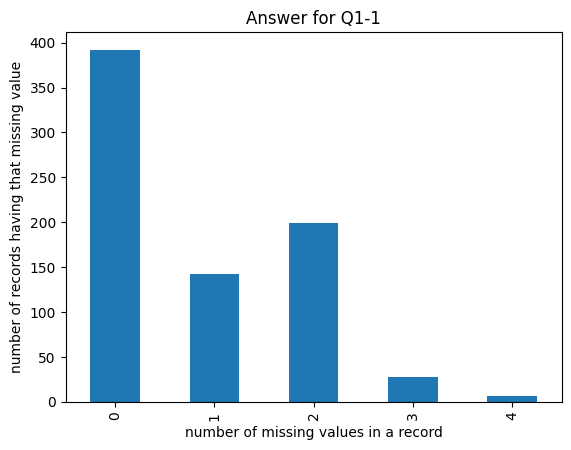

In [2]:
#Q1-1
df = pd.read_csv("diabetes.csv")

cols_to_null = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
df[cols_to_null] = df[cols_to_null].replace(0,None)
null_freq = df.isnull().sum(axis = 1).value_counts().sort_index()


null_freq.plot(kind = "bar")
plt.ylabel('number of records having that missing value')
plt.xlabel('number of missing values in a record')
plt.title("Answer for Q1-1")

Text(0.5, 1.0, 'Answer for Q1-2')

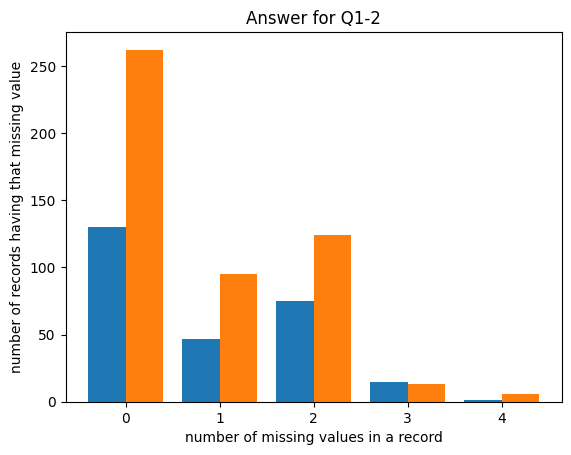

In [3]:
#Q1-2

pos_null_freq = df[df["Outcome"] == 1].isnull().sum(axis=1).value_counts().sort_index()
neg_null_freq = df[df["Outcome"] == 0].isnull().sum(axis=1).value_counts().sort_index()
width = 0.4
pos_bars = plt.bar(pos_null_freq.index-(1/2)*width, pos_null_freq.values, width, label='Outcome = 1')
neg_bars = plt.bar(neg_null_freq.index+(1/2)*width, neg_null_freq.values, width, label='Outcome = 0')
plt.ylabel('number of records having that missing value')
plt.xlabel('number of missing values in a record')
plt.title("Answer for Q1-2")

In [4]:
#Q1-3
cond_p_df = pd.DataFrame()
for col_x in cols_to_null:
    for col_y in cols_to_null:
        y_null_df = df[df.loc[:,col_y].isnull()]
        y_null_counts = y_null_df.shape[0]
        x_null_counts = y_null_df.loc[:,col_x].isnull().sum()
        cond_p_df.loc[col_x,col_y] = x_null_counts/y_null_counts
cond_p_df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
Glucose,1.0,0.000000,0.000000,0.010695,0.000000
BloodPressure,0.0,1.000000,0.145374,0.093583,0.636364
SkinThickness,0.0,0.942857,1.000000,0.606952,0.818182
Insulin,0.8,1.000000,1.000000,1.000000,0.909091
BMI,0.0,0.200000,0.039648,0.026738,1.000000


In [5]:
#Q1-4


df = pd.read_csv("diabetes.csv")
cols_to_null = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

df2 = df[cols_to_null].applymap(lambda x:1 if x !=0 else x)

# get the combination of all columns that have null
l = []
for col1 in df2.columns:
    for col2 in df2.columns:
        if df2.columns.get_loc(col1) < df2.columns.get_loc(col2):
            l.append((col1,col2))
            
for i in l:
    chi2,p,_,_= chi2_contingency(pd.crosstab(df2[i[0]],df2[i[1]]))
    if p <= 0.05:
        print("For {} and {}, the Chi Square is {:.4f} and p-value is {:.4f}. Therefore, I can reject H0.".format(i[0],i[1],chi2,p))
    else:
        print("For {} and {}, the Chi Square is {:.4f}, p-value is {:.4f}. Therefore, I cannot reject H0.".format(i[0],i[1],chi2,p))
        
        
            
#print(col1,col2,pd.crosstab(df2["Glucose"],df2["BloodPressure"]))


    
#df[cols_to_null] = [df[cols_to_null]!=0]


For Glucose and BloodPressure, the Chi Square is 0.0000, p-value is 1.0000. Therefore, I cannot reject H0.
For Glucose and SkinThickness, the Chi Square is 0.9245, p-value is 0.3363. Therefore, I cannot reject H0.
For Glucose and Insulin, the Chi Square is 0.9141, p-value is 0.3390. Therefore, I cannot reject H0.
For Glucose and BMI, the Chi Square is 0.0000, p-value is 1.0000. Therefore, I cannot reject H0.
For BloodPressure and SkinThickness, the Chi Square is 70.5716 and p-value is 0.0000. Therefore, I can reject H0.
For BloodPressure and Insulin, the Chi Square is 36.5107 and p-value is 0.0000. Therefore, I can reject H0.
For BloodPressure and BMI, the Chi Square is 76.3022 and p-value is 0.0000. Therefore, I can reject H0.
For SkinThickness and Insulin, the Chi Square is 336.5713 and p-value is 0.0000. Therefore, I can reject H0.
For SkinThickness and BMI, the Chi Square is 12.2032 and p-value is 0.0005. Therefore, I can reject H0.
For Insulin and BMI, the Chi Square is 6.3373 and

#Q2-1

No, this procedure doesn't guarantee that we can obtain a uniform sample of size n. The sample size made by this procedure will be governed by a Binominal distribution, which differs from the uniform distribution. That is because it can be considered as repeat N times independent trials and each trial has a probability of n/N to success and a probability of (1-n/N) to fail. Repeat this procedure, the number of success will typically follow a Binominal distribution.





Text(0.5, 1.0, 'Answer for Q2-2')

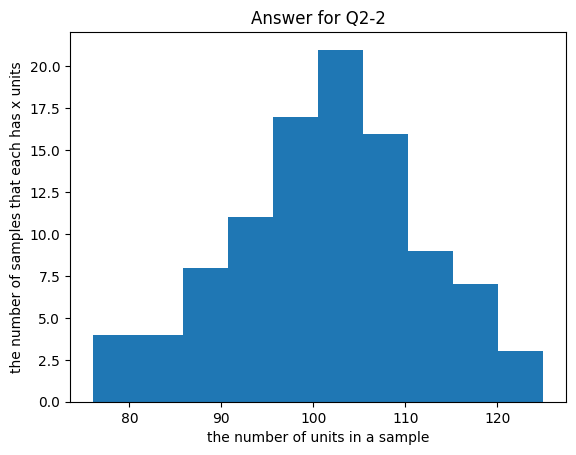

In [6]:
#Q2-2

random.seed(42)

N = 10000
n = 100
times = 100

def procedure(n,N):
    result = 0
    for _ in range(N):
        coin = random.randint(1, N)
        if coin <= n:
            result +=1
    return result

a = [procedure(n,N) for _ in range(times)]

plt.hist(a)
plt.ylabel('the number of samples that each has x units')
plt.xlabel('the number of units in a sample')
plt.title("Answer for Q2-2")

#Q3-1

$$\because \bar{X} = \frac{1}{n} \sum_{i=1}^{n} X_i 
\newline E(X_i) = \mu$$
$$\therefore E(\bar{X}) = E(\frac{1}{n} \sum_{i=1}^{n}X_i) = \frac{1}{n} \sum_{i=1}^{n}E(X_i) =\frac{1}{n} \sum_{i=1}^{n}\mu= \mu$$
Therefore, the sample mean is an unbiased estimator of the population mean.

#Q3-2
Two possible biases, both can distort the estimation of the population:
1. People who are mentally illed may be reluctant to trust clinics for various reasons.
2. People who come to clinics and receive medical cares may be indicative of their poor health condition. This might means. they are more likely to have a mental illness. 

#Q4-1
If we truncate the result, we may end up with a sample size smaller than n. For instance, if Group A, B and C have 84,9,8 people respectively. By truancating the result, we won't have any sample to represent B and C. We will only have 8 to represent Group A.

#Q4-2
If we round up the result, we may end up with a sample size larger than n. For instance, if Group A, B and C have 84,9,8 people respectively. By rounding up the result, we will have 9 samples from Group A, and 1 each from Group B and C. This would give us a total of 11 samples, which exceeds the number we expect.

In [7]:
#Q4-3


def hh_method(group,sample_size):
    samples = {key:1 for key in group.keys()}
    samples_remained = sample_size - len(group)
    print("A total of {} sample have been equally assigned to {} groups\n".format(len(group),len(group)))
    
    quotient = {key: 0 for key in group.keys()}
    while samples_remained > 0:
        for key in group:
            n = group[key]
            m = samples[key]
            quotient[key] = n/((m*(m+1))**(1/2))
            print("The quotient for {} is {:.4f}".format(key,quotient[key]))
        max_key = max(quotient,key=quotient.get)
        samples[max_key] +=1
        samples_remained -=1
        print("The largest quotient is {:.4f}. The {} th sample should be assigned to Group {}\n".format(quotient[max_key],sample_size-samples_remained,max_key))
    print("The result is shown below:")
    print(samples)
   


group = {'A':84, 'B':9,'C':7}
sample_size = 10

hh_method(group,10)

A total of 3 sample have been equally assigned to 3 groups

The quotient for A is 59.3970
The quotient for B is 6.3640
The quotient for C is 4.9497
The largest quotient is 59.3970. The 4 th sample should be assigned to Group A

The quotient for A is 34.2929
The quotient for B is 6.3640
The quotient for C is 4.9497
The largest quotient is 34.2929. The 5 th sample should be assigned to Group A

The quotient for A is 24.2487
The quotient for B is 6.3640
The quotient for C is 4.9497
The largest quotient is 24.2487. The 6 th sample should be assigned to Group A

The quotient for A is 18.7830
The quotient for B is 6.3640
The quotient for C is 4.9497
The largest quotient is 18.7830. The 7 th sample should be assigned to Group A

The quotient for A is 15.3362
The quotient for B is 6.3640
The quotient for C is 4.9497
The largest quotient is 15.3362. The 8 th sample should be assigned to Group A

The quotient for A is 12.9615
The quotient for B is 6.3640
The quotient for C is 4.9497
The largest 

In [15]:
#5-1
from scipy.stats import t

def cal_mean(df,col,sample_rate,alpha=0.05):
    sample = df[col].sample(frac=sample_rate,random_state=42)
    mean = sample.mean()
    std_error = stats.sem(sample)
    t_value = t.ppf(1-alpha/2,df = len(sample)-1)
    lower_bound = mean-t_value*std_error 
    upper_bound = mean+t_value*std_error
    return mean,lower_bound,upper_bound
    
    
df = pd.read_csv("diabetes.csv")
m1,l1,u1 = cal_mean(df,'Outcome',0.05)
m2,l2,u2 = cal_mean(df,'Outcome',0.10)
print("For sampling rate {:.2f}, the sample mean is {:.4f} and the 95% confidence intervals for the population mean is [{:.4f}, {:.4f}]".format(0.05,m1,l1,u1))
print("For sampling rate {:.2f}, the sample mean is {:.4f} and the 95% confidence intervals for the population mean is [{:.4f}, {:.4f}]".format(0.10,m2,l2,u2))

For sampling rate 0.05, the sample mean is 0.3684 and the 95% confidence intervals for the population mean is [0.2077, 0.5291]
For sampling rate 0.10, the sample mean is 0.3506 and the 95% confidence intervals for the population mean is [0.2416, 0.4597]


In [9]:
#5-2
df = pd.read_csv("diabetes.csv")
np.random.seed(42)

pop_mean = df['Outcome'].mean()

def aloc_into_stratums(df,col,mode = 0):
    min_value = min(df[col])
    max_value = max(df[col])
    if mode == 1:
        step = 10
    elif mode == 0:
        step = (max_value - min_value)/10
    

    lower_bound = min_value
    upper_bound = min_value + step
    stratums = []
    
    while upper_bound <= max_value + step:
        s = df[(lower_bound<=df[col]) & (df[col]<upper_bound)]
        if len(s) > 0:
            stratums.append([s,len(s)])
        lower_bound += step
        upper_bound += step
        
    return stratums

def stratified_simple_sampling(stratums,sample_rate = 0.1):
    sample_set = []
    for stra in stratums:
        if stra[1] >= 10:
            sample = stra[0].sample(frac=sample_rate)
            sample_set.append(sample)

    return sample_set


def calculate_outcome_mean(sample_set):
    all_samples = pd.DataFrame()
    for s in sample_set:
        all_samples = pd.concat([all_samples,s])
    return all_samples['Outcome'].mean()



    
attributes = ['Pregnancies','Glucose','BloodPressure','Age']
att_y_mean = {}
for a in attributes:
    if a == 'Age' or a == 'Glucose' or a == 'Age':
        stratum = aloc_into_stratums(df,a,mode = 1)
    else:
        stratum = aloc_into_stratums(df,a)
    sample_set = stratified_simple_sampling(stratum)
    sample_mean = calculate_outcome_mean(sample_set)
    att_y_mean[a] = abs(sample_mean - pop_mean)
    print("{} gives a mean {:.4f}.The difference with the population mean is {:.4f}".format(a,sample_mean,att_y_mean[a]))
    
the_best = min(att_y_mean,key = att_y_mean.get)


print("{} gives the best estimation as it has the smallest difference with the population mean {:.4f}".format(the_best,att_y_mean[the_best]))

print("""
The reason might be:
By stratifing the data set by {} , the stratums are more similar to each others. Therefore, the 
total variance of the stratums is smaller and makes estimation more accurate.
""".format(the_best))

Pregnancies gives a mean 0.3816.The difference with the population mean is 0.0326
Glucose gives a mean 0.3425.The difference with the population mean is 0.0065
BloodPressure gives a mean 0.2895.The difference with the population mean is 0.0595
Age gives a mean 0.3158.The difference with the population mean is 0.0332
Glucose gives the best estimation as it has the smallest difference with the population mean 0.0065

The reason might be:
By stratifing the data set by Glucose , probably the stratums are more similar to each others, so the 
total variance of the stratums is smaller. This makes estimation more accurate.



In [14]:
#5-3
df = pd.read_csv("diabetes.csv")
random.seed(42)
pop_mean = df['Outcome'].mean()

def cluster_simple_sampling(df,col):
    sorted_df = df.sort_values(by=col)
    primary_units = np.array_split(sorted_df, 30)
    selected_units = random.sample(primary_units, 3)
    
    return selected_units


def calculate_outcome_mean(sample_set):
    all_samples = pd.DataFrame()
    for s in sample_set:
        all_samples = pd.concat([all_samples,s])
    return all_samples['Outcome'].mean()

attributes = ['Pregnancies','Glucose','BloodPressure','Age'] 
att_y_mean = {}
for a in attributes:
    sample_set = cluster_simple_sampling(df,a)
    sample_mean = calculate_outcome_mean(sample_set)
    att_y_mean[a] = abs(sample_mean - pop_mean)
    print("{} gives a mean {:.4f}.The difference with the population mean is {:.4f}".format(a,sample_mean,att_y_mean[a]))

the_best = min(att_y_mean,key = att_y_mean.get)

print("{} gives the best estimation as it has the smallest difference with the population mean {:.4f}".format(the_best,att_y_mean[the_best]))

print("""
The reason might be:
By allocating the data set into different clusters according to {}, the clusters are more similar to each others.
Therefore, the total variance of the estimation is smaller and this makes estimation more accurate.
""".format(the_best))

Pregnancies gives a mean 0.3506.The difference with the population mean is 0.0017
Glucose gives a mean 0.3117.The difference with the population mean is 0.0373
BloodPressure gives a mean 0.2468.The difference with the population mean is 0.1022
Age gives a mean 0.3553.The difference with the population mean is 0.0063
Pregnancies gives the best estimation as it has the smallest difference with the population mean 0.0017

The reason might be:
By allocating the data set into different clusters according to Pregnancies, probably the clusters are more similar to each others,
so the total variance of the estimation is smaller. This makes estimation more accurate.



Text(0.5, 1.0, 'Power Law Distribution')

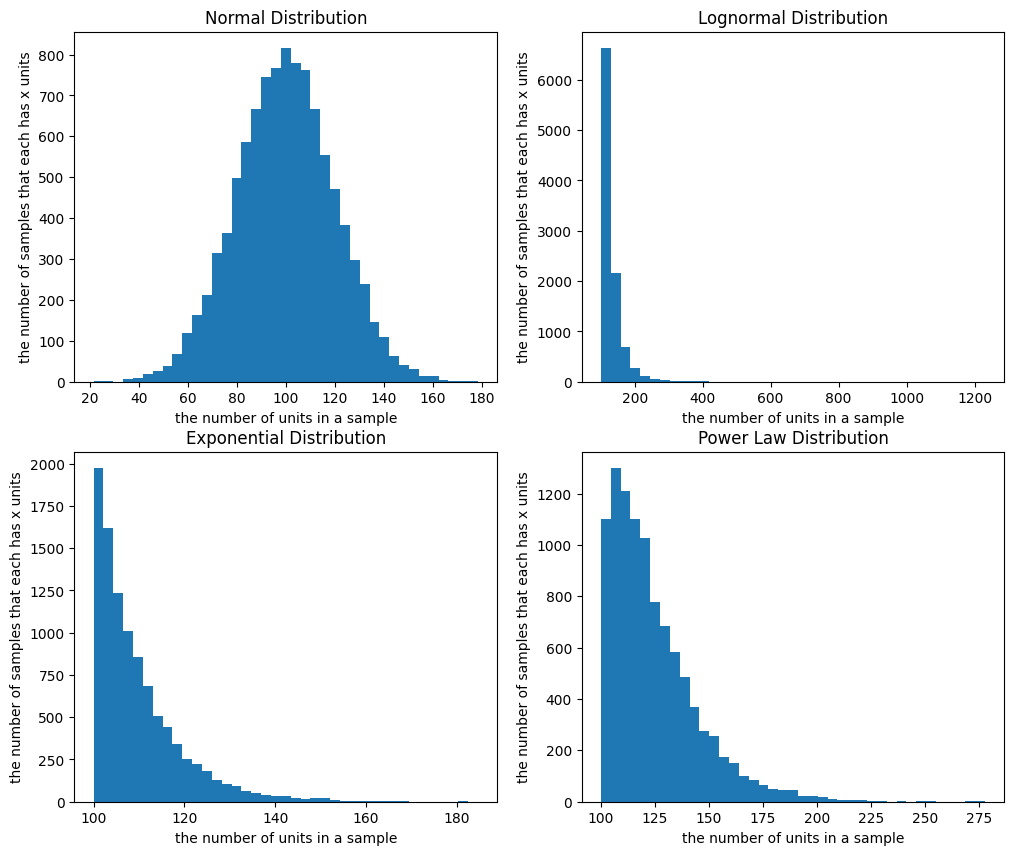

In [11]:
#6-1


np.random.seed(42)

n = 10000
n_bins = 39
plt.figure(figsize=(12, 10))

#normal distribution
s1_mean = 100
s1_std_dev = 20

#normald distribution
s1 = np.random.normal(s1_mean,s1_std_dev, n)
plt.subplot(2, 2, 1) 
plt.hist(s1,bins = n_bins)
plt.ylabel('the number of samples that each has x units')
plt.xlabel('the number of units in a sample')
plt.title("Normal Distribution")

#lognormal distribution 
s2_mean = 3
s2_std = 0.9
s2 = np.exp(1)**(np.random.normal(s2_mean,s2_std,n))+100
plt.subplot(2, 2, 2) 
plt.hist(s2,bins = n_bins)
plt.ylabel('the number of samples that each has x units')
plt.xlabel('the number of units in a sample')
plt.title("Lognormal Distribution")

#exponential distribution
s3_mean = 10
s3 = np.random.exponential(s3_mean, n) + 100
plt.subplot(2, 2, 3) 
plt.hist(s3, bins = n_bins)
plt.ylabel('the number of samples that each has x units')
plt.xlabel('the number of units in a sample')
plt.title("Exponential Distribution")


#power law distribution
s4_mean = 3
s4_std = 1
s4 = (np.abs(np.random.normal(s4_mean,s4_std,n))**np.exp(1))+100
plt.subplot(2, 2, 4) 
plt.hist(s4, bins = n_bins)
plt.ylabel('the number of samples that each has x units')
plt.xlabel('the number of units in a sample')
plt.title("Power Law Distribution")

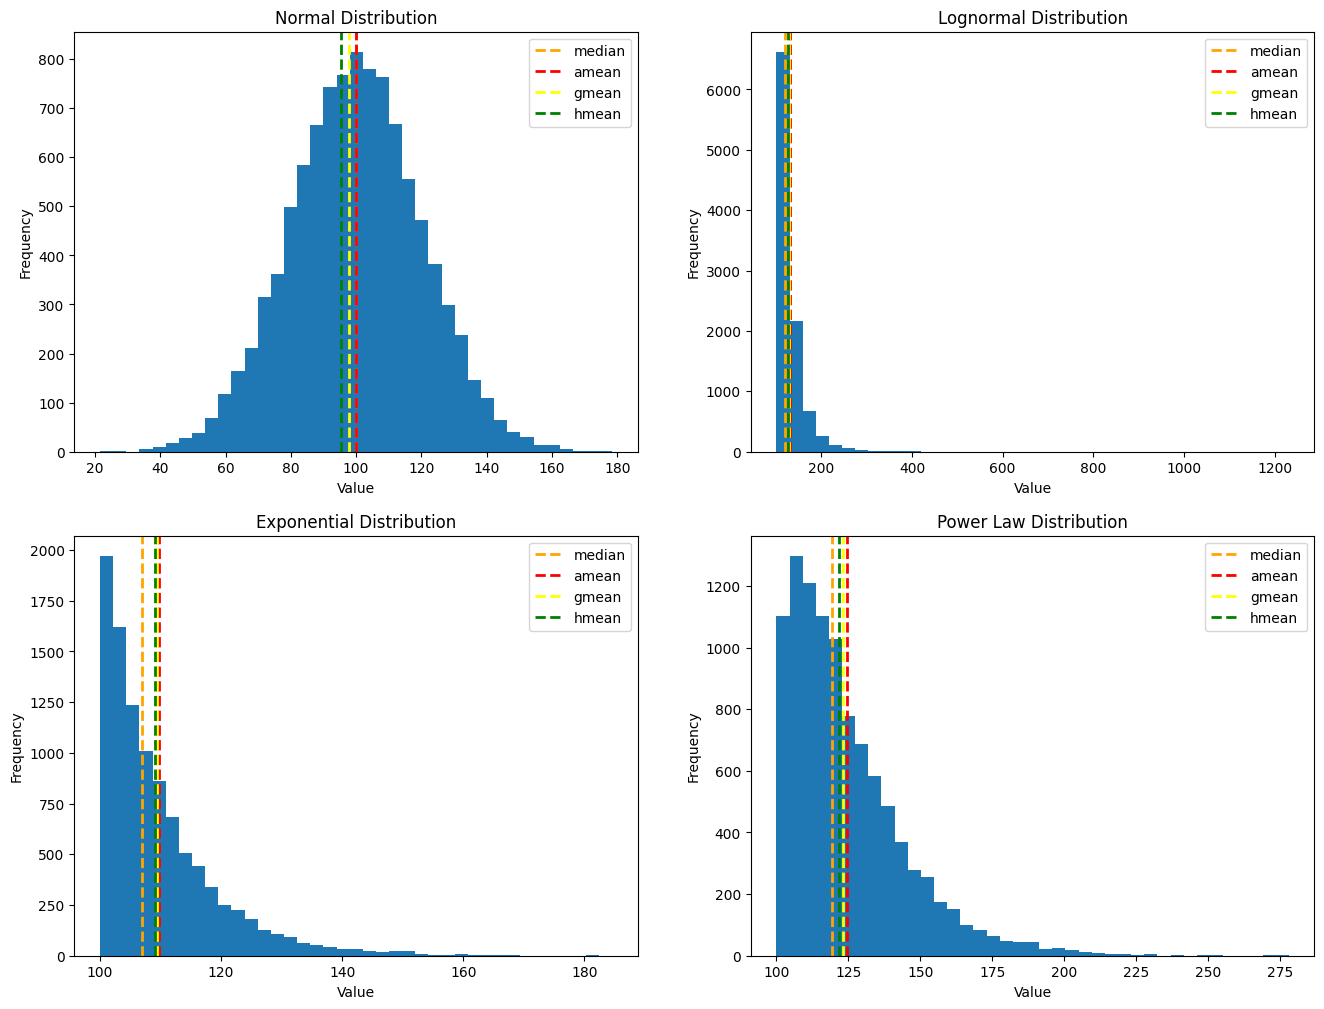

In [12]:
#6-2


def plot_med_pgmean(s,ax,ax_name):
    median = np.median(s)
    arithmetic_mean = np.mean(s)
    geometric_mean = scipy.stats.gmean(s)
    harmonic_mean = scipy.stats.hmean(s)
    
    ax.hist(s, bins=39)
    ax.axvline(median, color='orange', linestyle='dashed', linewidth=2,label = "median")
    ax.axvline(arithmetic_mean, color='red', linestyle='dashed', linewidth=2,label = 'amean')
    ax.axvline(geometric_mean, color='yellow', linestyle='dashed', linewidth=2, label = 'gmean')
    ax.axvline(harmonic_mean, color='green', linestyle='dashed', linewidth=2, label = 'hmean')

    ax.legend()
    ax.set_title(ax_name)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')


fig,axes = plt.subplots(2, 2, figsize=(16, 12))

plot_med_pgmean(s1, axes[0, 0],'Normal Distribution')
plot_med_pgmean(s2, axes[0, 1],'Lognormal Distribution')
plot_med_pgmean(s3, axes[1, 0],'Exponential Distribution')
plot_med_pgmean(s4, axes[1, 1],'Power Law Distribution')

In [13]:
#6-3
np.random.seed(42)

data = np.exp(1)**(np.random.normal(3,0.9,10000))
gmean = scipy.stats.gmean(data)
amean_log = np.mean(np.log10(data))
print("The geometric mean of the lognormal distribution is {:.4f}".format(gmean))
print("The antilog of the arithmetic mean of the log transformed values of the dataset is {:.4f}".format(10**amean_log))

if round(gmean,4) == round(10**amean_log,4):
    print("Thease two values are the same")
else:
    print("Thease two values are not the same")

The geometric mean of the lognormal distribution is 20.0470
The antilog of the arithmetic mean of the log transformed values of the dataset is 20.0470
Thease two values are the same
